**#include libraries**

In [45]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

**# URL of the image on GitHub**

In [46]:

image_url = 'https://github.com/pujan08/object_extractor/raw/main/book_img.png'

**# Function to perform Simple Thresholding**

In [47]:
def simple_thresholding(image_gray):
    _, binary = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
    return binary


**# Function to perform Adaptive Thresholding**

In [48]:
def adaptive_thresholding(image_gray):
    binary = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    return binary


**# Function to perform Otsu's Thresholding**

In [49]:
def otsu_thresholding(image_gray):
    _, binary = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary

**# Function to perform Riddler-Calvard Thresholding**

In [50]:
def riddler_calvard(image_gray):
    hist = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
    hist = hist.reshape((256,))
    threshold = 128
    old_threshold = -1
    while old_threshold != threshold:
        old_threshold = threshold
        q1 = np.sum(hist[:threshold]) / np.sum(hist)
        q2 = np.sum(hist[threshold:]) / np.sum(hist)
        m1 = np.sum(np.array([i for i in range(threshold)]) * hist[:threshold]) / np.sum(hist[:threshold])
        m2 = np.sum(np.array([i for i in range(threshold, 256)]) * hist[threshold:]) / np.sum(hist[threshold:])
        threshold = int((m1 + m2) / 2)
    _, binary = cv2.threshold(image_gray, threshold, 255, cv2.THRESH_BINARY)
    return binary

**# Function to perform background extraction**

In [51]:
def extract_background(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=2)
    _, background_mask = cv2.threshold(opening, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    background = cv2.bitwise_and(image, image, mask=background_mask)
    return background


**# Fetch the image from the URL**

In [52]:
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
image_np = np.array(image)


**# Convert the image to grayscale**

In [53]:
image_gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

**# Perform thresholding for all techniques**

In [54]:
binaries = []
backgrounds = []

**# Simple Thresholding**

In [55]:
binary_simple = simple_thresholding(image_gray)
background_simple = extract_background(image_np)
binaries.append(binary_simple)
backgrounds.append(background_simple)

**# Adaptive Thresholding**

In [56]:
binary_adaptive = adaptive_thresholding(image_gray)
background_adaptive = extract_background(image_np)
binaries.append(binary_adaptive)
backgrounds.append(background_adaptive)

**# Otsu's Thresholding**

In [57]:
binary_otsu = otsu_thresholding(image_gray)
background_otsu = extract_background(image_np)
binaries.append(binary_otsu)
backgrounds.append(background_otsu)

**# Riddler-Calvard Thresholding**

In [58]:
binary_riddler_calvard = riddler_calvard(image_gray)
background_riddler_calvard = extract_background(image_np)
binaries.append(binary_riddler_calvard)
backgrounds.append(background_riddler_calvard)

**# Display the results**

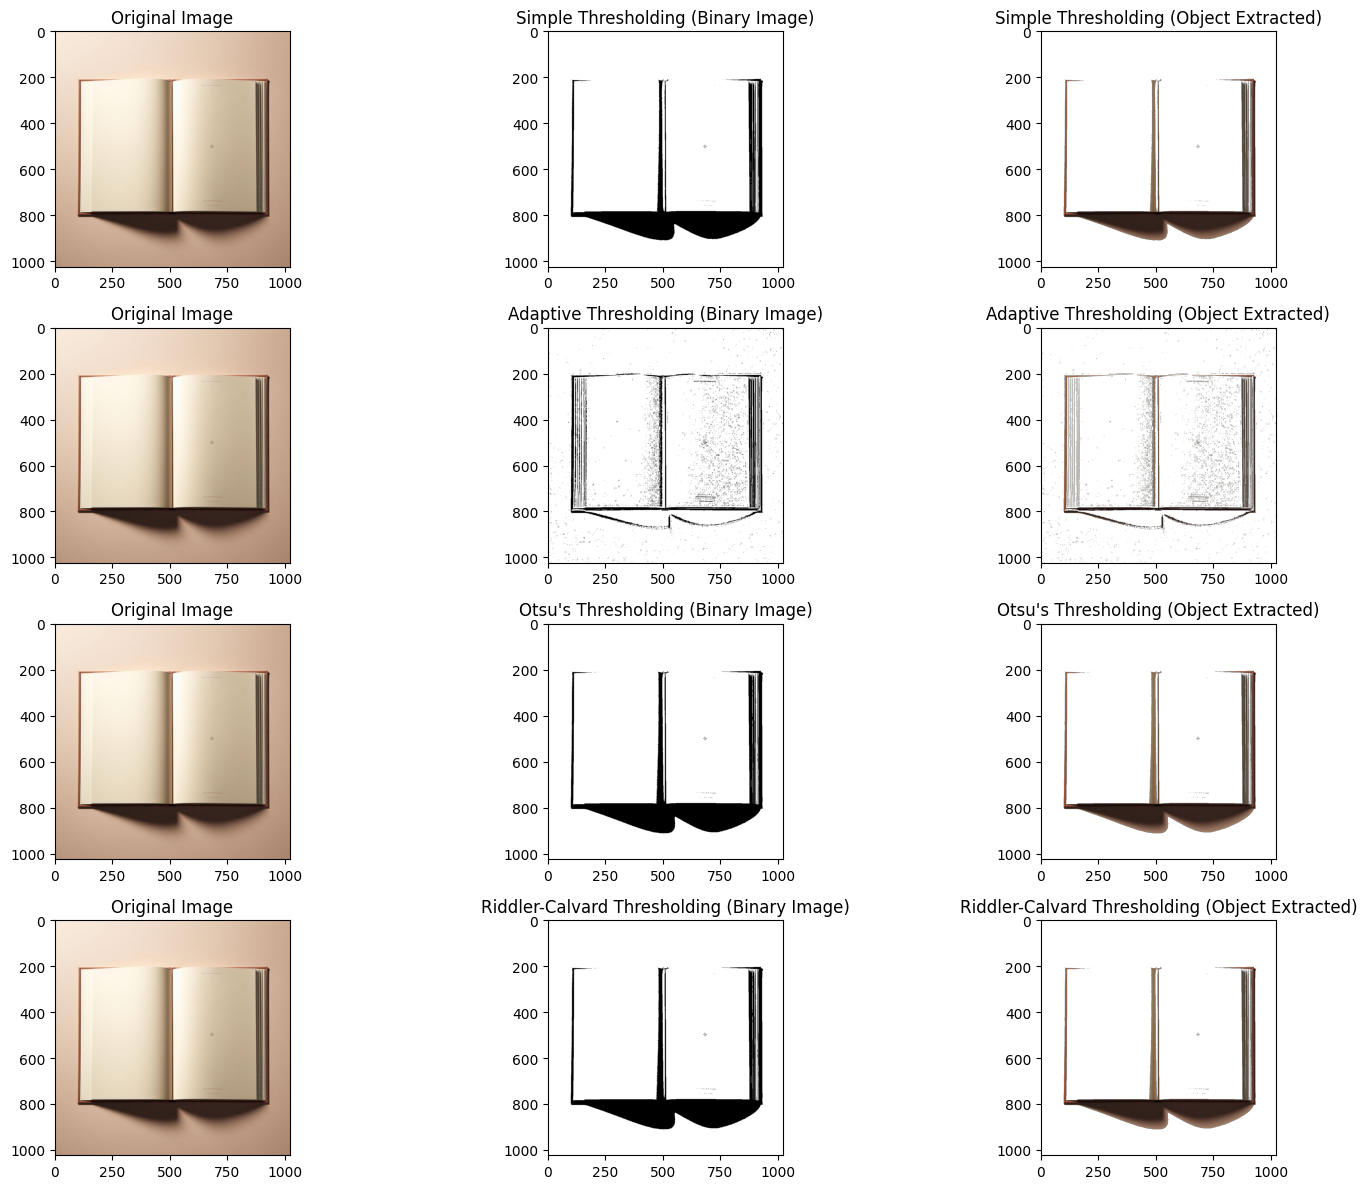

In [59]:
titles = ['Simple Thresholding', 'Adaptive Thresholding', "Otsu's Thresholding", 'Riddler-Calvard Thresholding']
plt.figure(figsize=(16, 12))

for i in range(4):
    plt.subplot(4, 3, i * 3 + 1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(4, 3, i * 3 + 2)
    plt.imshow(binaries[i], cmap='gray')
    plt.title(titles[i] + ' (Binary Image)')

    plt.subplot(4, 3, i * 3 + 3)
    plt.imshow(cv2.bitwise_and(image_np, image_np, mask=~binaries[i]))
    plt.title(titles[i] + ' (Object Extracted)')

plt.tight_layout()
plt.show()
